In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
image_folder = r'C:\Users\S.SAI\OneDrive\Desktop\LiTS\train_images\train_images'
mask_folder  = r'C:\Users\S.SAI\OneDrive\Desktop\LiTS\train_masks\train_masks'
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])
mask_files  = sorted([f for f in os.listdir(mask_folder) if f.endswith('.jpg')])
print(f"Total images: {len(image_files)}")
print(f"Total masks : {len(mask_files)}")

Total images: 58638
Total masks : 58638


In [3]:
tumor_count = 0
non_tumor_count = 0
for fname in mask_files:
    mask = cv2.imread(os.path.join(mask_folder, fname), cv2.IMREAD_GRAYSCALE)
    if np.any(mask):
        tumor_count += 1
    else:
        non_tumor_count += 1
print(f"Tumor-containing masks: {tumor_count}")
print(f"Non-tumor masks: {non_tumor_count}")

Tumor-containing masks: 18834
Non-tumor masks: 39804


In [4]:
tumor_pairs = []
non_tumor_pairs = []

for fname in os.listdir(mask_folder):
    if not fname.endswith('.jpg'):
        continue

    mask_path = os.path.join(mask_folder, fname)
    image_path = os.path.join(image_folder, fname)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        continue

    if np.any(mask):
        tumor_pairs.append((image_path, mask_path))
    else:
        non_tumor_pairs.append((image_path, mask_path))

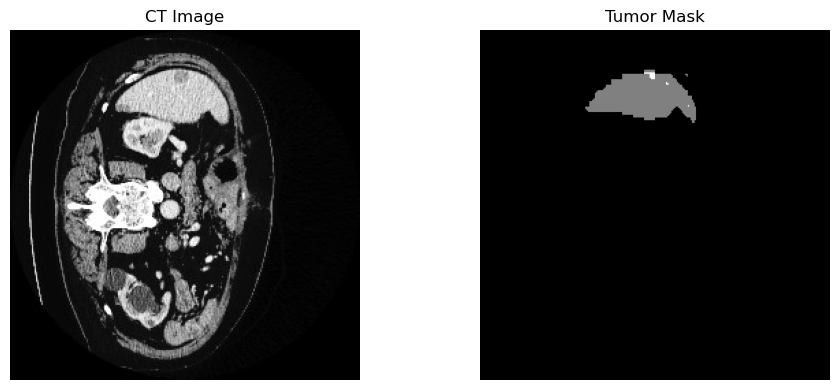

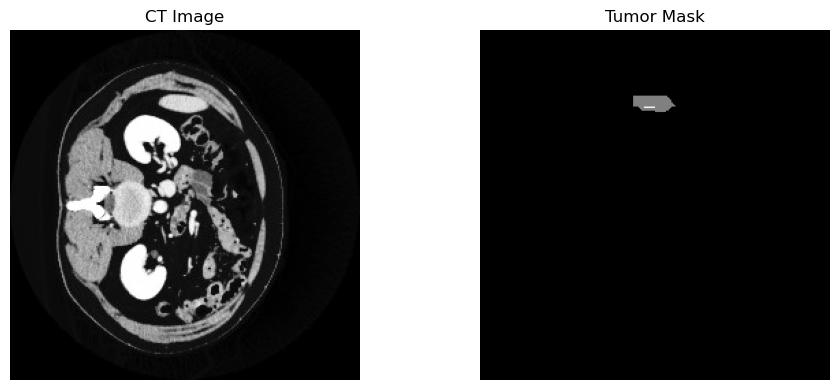

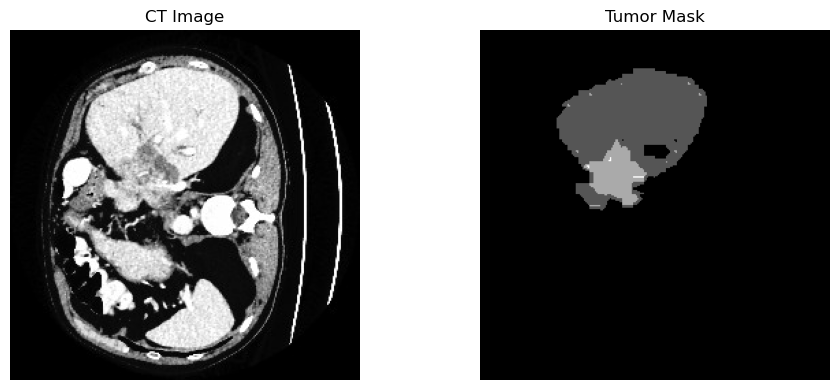

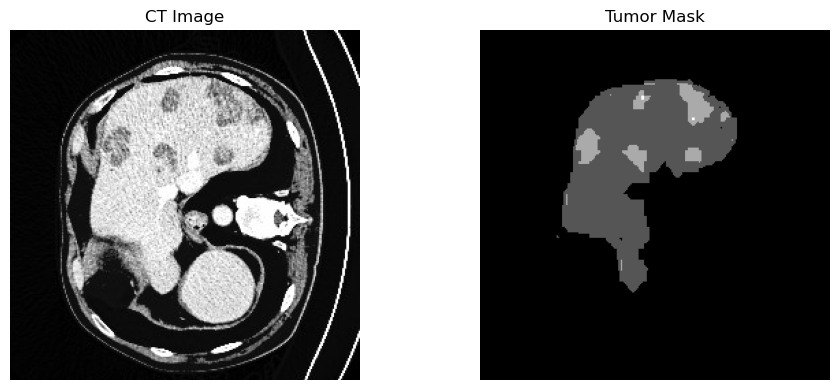

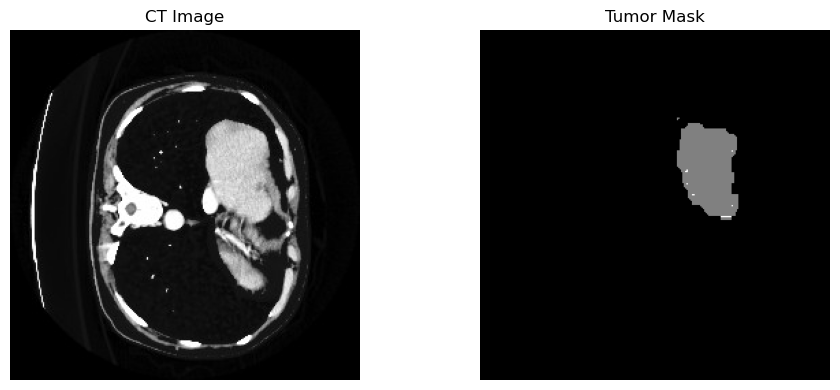

In [5]:
def show_tumor_pair(image_path, mask_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("CT Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Tumor Mask")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

sample_tumor_pairs = random.sample(tumor_pairs, 5)
for img_path, mask_path in sample_tumor_pairs:
    show_tumor_pair(img_path, mask_path)